In [1]:
import torch
from torch import nn
import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(111)

In [2]:
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [5]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform)

In [6]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)

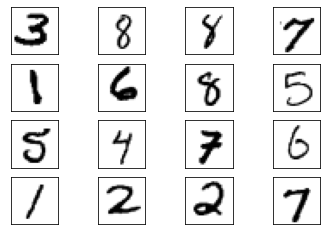

In [7]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

discriminator = Discriminator().to(device=device)

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [10]:
lr = 0.0001
epochs = 50
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Epoch: 0 Loss D.: 0.5180156230926514
Epoch: 0 Loss G.: 0.9672415256500244


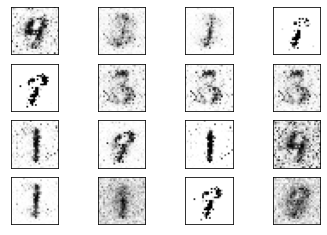

Epoch: 1 Loss D.: 0.11289032548666
Epoch: 1 Loss G.: 4.092129707336426


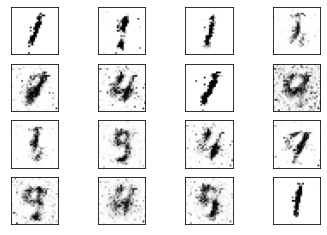

Epoch: 2 Loss D.: 0.18663941323757172
Epoch: 2 Loss G.: 3.301581382751465


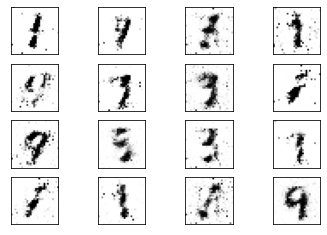

Epoch: 3 Loss D.: 0.25538763403892517
Epoch: 3 Loss G.: 2.152897834777832


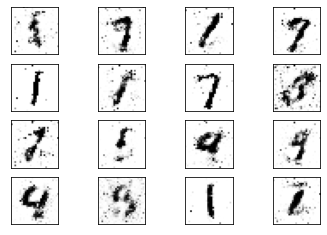

Epoch: 4 Loss D.: 0.28369998931884766
Epoch: 4 Loss G.: 2.663429021835327


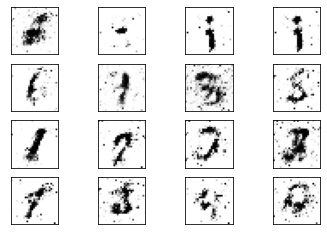

Epoch: 5 Loss D.: 0.25480151176452637
Epoch: 5 Loss G.: 2.2499494552612305


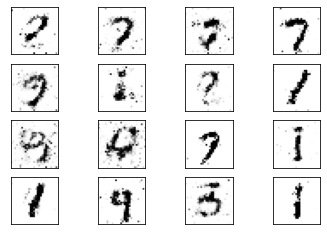

Epoch: 6 Loss D.: 0.43050235509872437
Epoch: 6 Loss G.: 1.3791615962982178


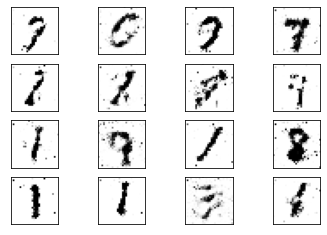

Epoch: 7 Loss D.: 0.46327412128448486
Epoch: 7 Loss G.: 1.8085298538208008


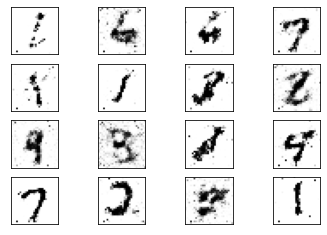

Epoch: 8 Loss D.: 0.4839555323123932
Epoch: 8 Loss G.: 1.479549765586853


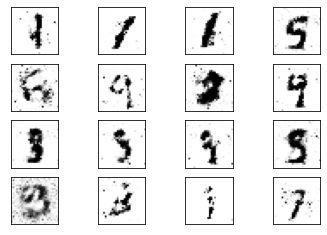

Epoch: 9 Loss D.: 0.4566141366958618
Epoch: 9 Loss G.: 1.0487327575683594


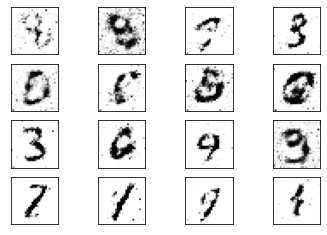

Epoch: 10 Loss D.: 0.4992491900920868
Epoch: 10 Loss G.: 1.1297345161437988


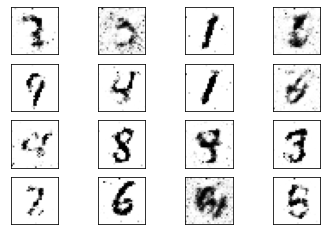

Epoch: 11 Loss D.: 0.6300171613693237
Epoch: 11 Loss G.: 1.171259880065918


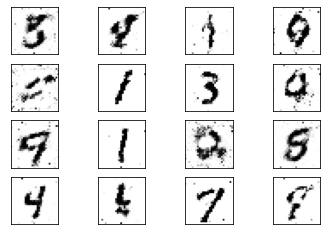

Epoch: 12 Loss D.: 0.6347895860671997
Epoch: 12 Loss G.: 0.938942551612854


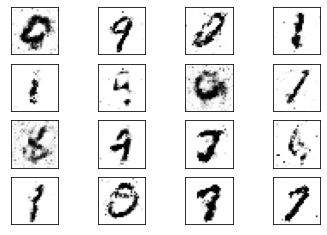

Epoch: 13 Loss D.: 0.6149051785469055
Epoch: 13 Loss G.: 0.8836776614189148


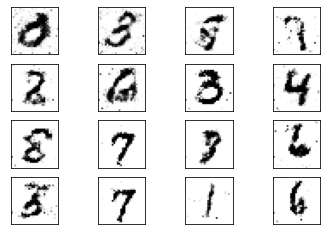

Epoch: 14 Loss D.: 0.6074953675270081
Epoch: 14 Loss G.: 1.1364353895187378


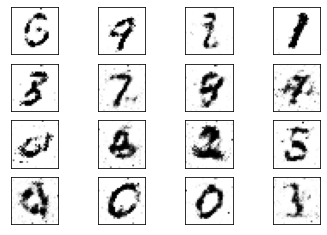

Epoch: 15 Loss D.: 0.4910154342651367
Epoch: 15 Loss G.: 1.1354317665100098


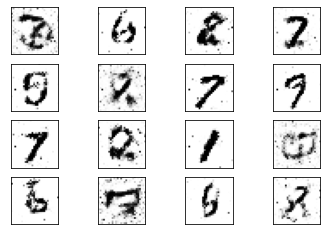

Epoch: 16 Loss D.: 0.6115738153457642
Epoch: 16 Loss G.: 0.786937952041626


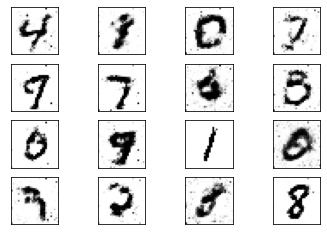

Epoch: 17 Loss D.: 0.5540474653244019
Epoch: 17 Loss G.: 0.8674350380897522


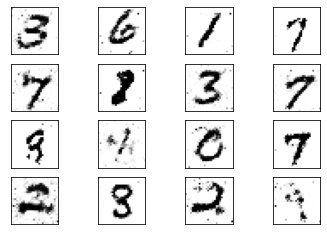

Epoch: 18 Loss D.: 0.5065099000930786
Epoch: 18 Loss G.: 1.0903375148773193


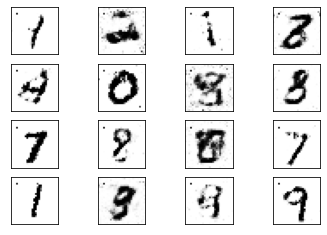

Epoch: 19 Loss D.: 0.5965257883071899
Epoch: 19 Loss G.: 1.0921847820281982


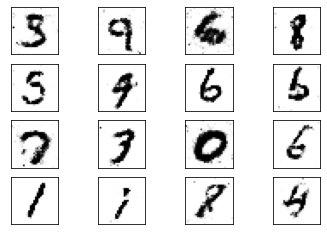

Epoch: 20 Loss D.: 0.5916275978088379
Epoch: 20 Loss G.: 1.0293574333190918


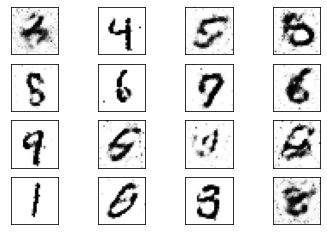

Epoch: 21 Loss D.: 0.5381083488464355
Epoch: 21 Loss G.: 1.0711264610290527


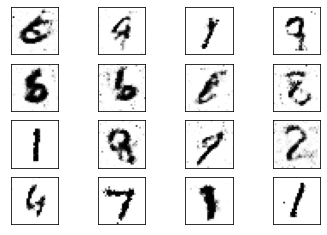

Epoch: 22 Loss D.: 0.7439405918121338
Epoch: 22 Loss G.: 0.6871224045753479


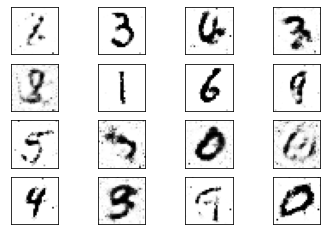

Epoch: 23 Loss D.: 0.7147891521453857
Epoch: 23 Loss G.: 0.8035792112350464


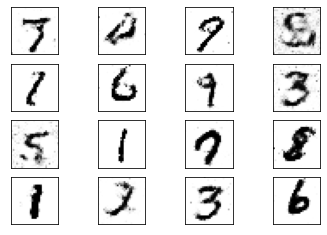

Epoch: 24 Loss D.: 0.6188600659370422
Epoch: 24 Loss G.: 0.845922589302063


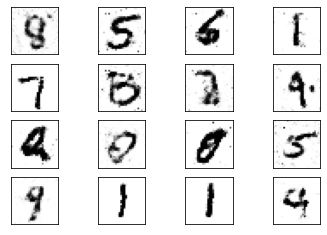

Epoch: 25 Loss D.: 0.5825544595718384
Epoch: 25 Loss G.: 0.7838959097862244


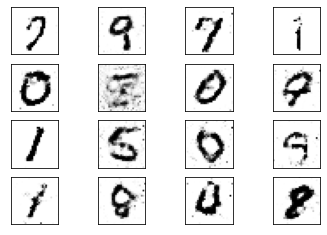

Epoch: 26 Loss D.: 0.5308482050895691
Epoch: 26 Loss G.: 0.9685531854629517


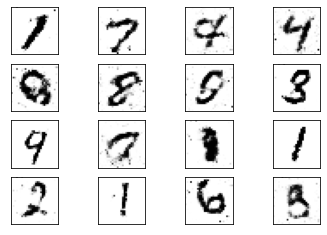

Epoch: 27 Loss D.: 0.6014354228973389
Epoch: 27 Loss G.: 0.840404212474823


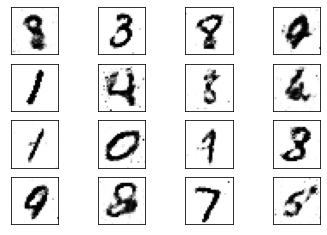

Epoch: 28 Loss D.: 0.5186201333999634
Epoch: 28 Loss G.: 0.9701367616653442


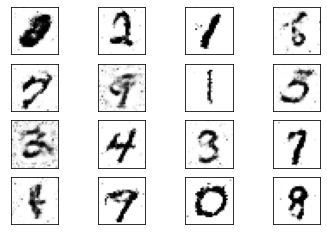

Epoch: 29 Loss D.: 0.6635054349899292
Epoch: 29 Loss G.: 0.944395899772644


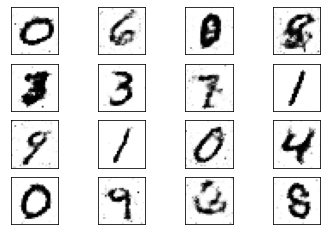

Epoch: 30 Loss D.: 0.6420121192932129
Epoch: 30 Loss G.: 0.8772713541984558


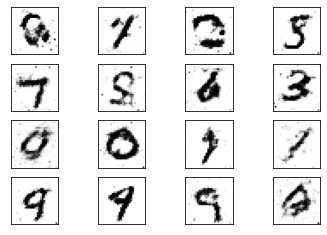

Epoch: 31 Loss D.: 0.6600922346115112
Epoch: 31 Loss G.: 0.865415632724762


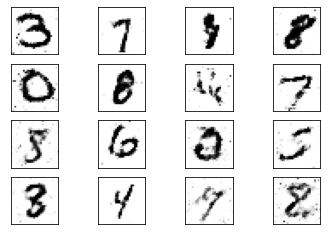

Epoch: 32 Loss D.: 0.559978187084198
Epoch: 32 Loss G.: 0.8734273910522461


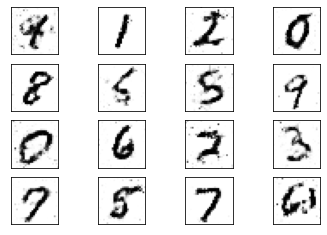

Epoch: 33 Loss D.: 0.6290708780288696
Epoch: 33 Loss G.: 0.8298388719558716


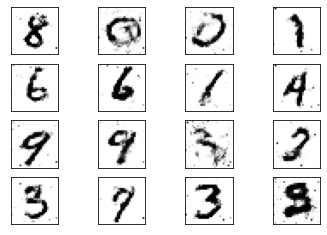

Epoch: 34 Loss D.: 0.6028512120246887
Epoch: 34 Loss G.: 0.9469648599624634


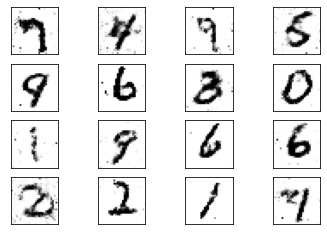

Epoch: 35 Loss D.: 0.5631244778633118
Epoch: 35 Loss G.: 0.8596137762069702


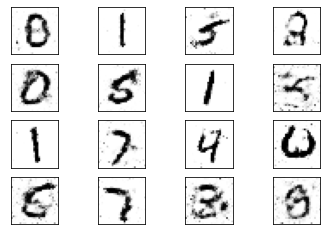

Epoch: 36 Loss D.: 0.670760989189148
Epoch: 36 Loss G.: 0.964734673500061


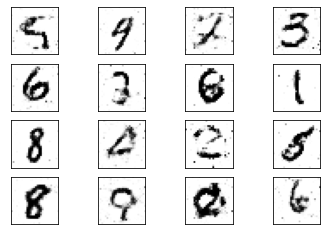

Epoch: 37 Loss D.: 0.6289220452308655
Epoch: 37 Loss G.: 0.8966096639633179


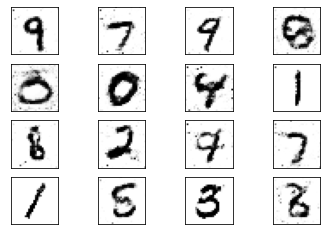

Epoch: 38 Loss D.: 0.6718130111694336
Epoch: 38 Loss G.: 0.9556865692138672


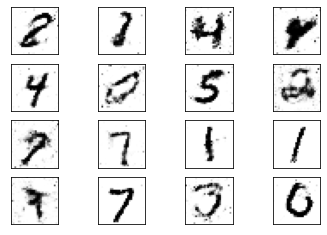

Epoch: 39 Loss D.: 0.6516692638397217
Epoch: 39 Loss G.: 0.9519551396369934


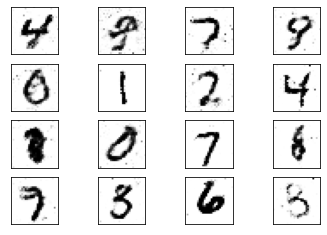

Epoch: 40 Loss D.: 0.5850887298583984
Epoch: 40 Loss G.: 0.7855408191680908


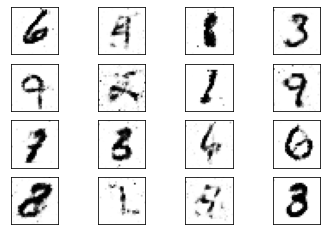

Epoch: 41 Loss D.: 0.6145906448364258
Epoch: 41 Loss G.: 0.8223458528518677


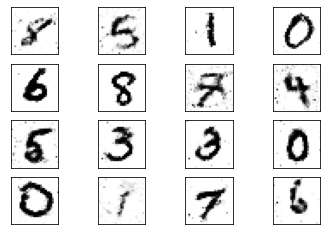

Epoch: 42 Loss D.: 0.6038872003555298
Epoch: 42 Loss G.: 0.803002119064331


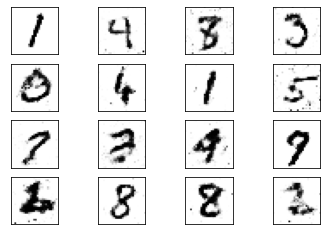

Epoch: 43 Loss D.: 0.7251310348510742
Epoch: 43 Loss G.: 0.8263052105903625


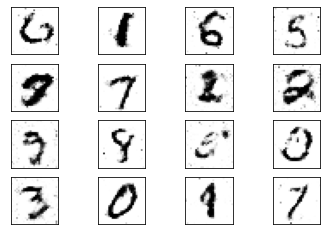

Epoch: 44 Loss D.: 0.6411433219909668
Epoch: 44 Loss G.: 0.8875362277030945


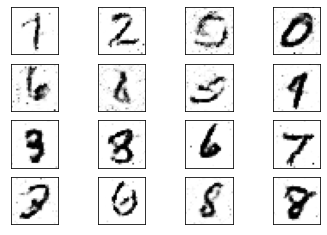

Epoch: 45 Loss D.: 0.5655981302261353
Epoch: 45 Loss G.: 0.9996737241744995


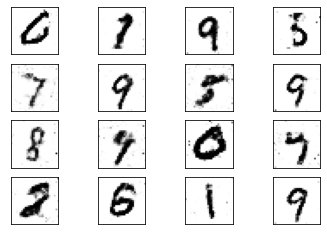

Epoch: 46 Loss D.: 0.5658578872680664
Epoch: 46 Loss G.: 0.8736167550086975


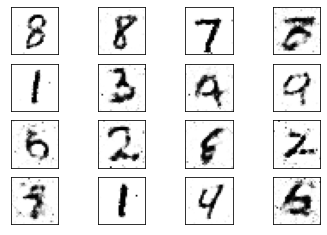

Epoch: 47 Loss D.: 0.6891517639160156
Epoch: 47 Loss G.: 0.9268572926521301


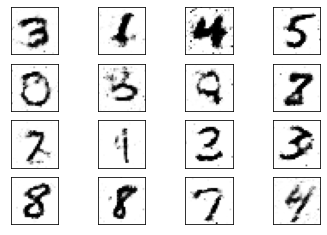

Epoch: 48 Loss D.: 0.6284773945808411
Epoch: 48 Loss G.: 0.8543674945831299


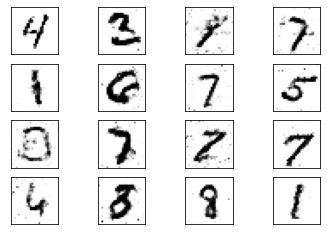

Epoch: 49 Loss D.: 0.6354332566261292
Epoch: 49 Loss G.: 0.8224514722824097


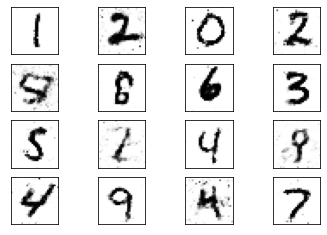

In [11]:
for epoch in range(epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for discriminator training
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device)
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device)
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device)
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))
        
        # Discriminator training
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for generator training
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device)

        # Generator training
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()
        
        generated_samples = generated_samples.cpu().detach()

        # Output value of loss function
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])
    plt.show()

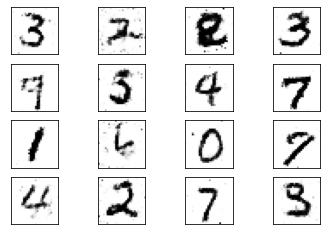

In [14]:
latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = generator(latent_space_samples)
generated_samples = generated_samples.cpu().detach()

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])
plt.show()